In [1]:
import numpy as np
import pandas as pd

In [2]:
car_data = pd.DataFrame({
    'Make': ['Toyota', 'Honda', 'BMW', 'Toyota', 'Nissan', 'BMW'],
    'Model': ['Corolla', 'Civic', 'X5', 'Camry', 'Altima', '3 Series'],
    'Year': [2015, 2018, 2020, 2012, 2017, 2019],
    'Odometer (KM)': [85000, 54000, 30000, 120000, 72000, 45000],
    'Price': [12000, 15000, 35000, 9000, 11000, 28000],
    'Condition': ['Used', 'Used', 'Certified', 'Used', 'Used', 'Certified'],
    'Fuel': ['Petrol', 'Petrol', 'Diesel', 'Hybrid', 'Hybrid', 'Diesel'],
    'Owner Count': [1, 2, 1, 3, 1, 2],
    'Service Score': np.random.randint(60, 100, size=6)
})

In [3]:
# GroupBy Examples

car_data.groupby(['Make'])['Price'].mean()

# SELECT
#     Make,
#     AVG(Price) AS avg_price
# FROM car_sales
# GROUP BY Make;

Make
BMW       31500.0
Honda     15000.0
Nissan    11000.0
Toyota    10500.0
Name: Price, dtype: float64

<Axes: xlabel='Model'>

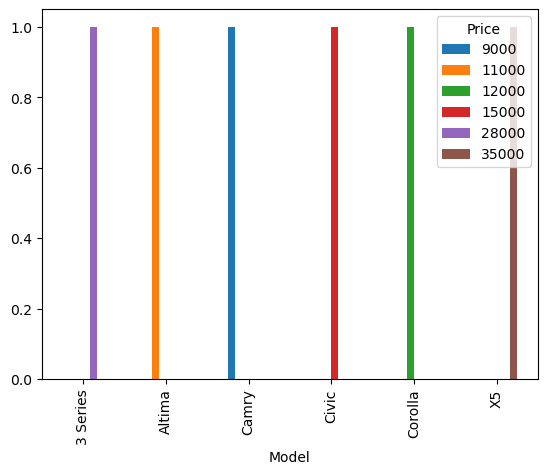

In [4]:
pd.crosstab(
    index=car_data['Model'],
    columns=car_data['Price']
).plot(kind='bar')

In [5]:
car_data.describe()

,Year,Odometer (KM),Price,Owner Count,Service Score
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2016.833333,67666.666667,18333.333333,1.666667,81.333333
std,2.926887,32178.667882,10614.455552,0.816497,11.147496
min,2012.000000,30000.000000,9000.000000,1.000000,61.000000
25%,2015.500000,47250.000000,11250.000000,1.000000,80.000000
50%,2017.500000,63000.000000,13500.000000,1.500000,83.500000
75%,2018.750000,81750.000000,24750.000000,2.000000,86.250000
max,2020.000000,120000.000000,35000.000000,3.000000,94.000000


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           6 non-null      object
 1   Model          6 non-null      object
 2   Year           6 non-null      int64 
 3   Odometer (KM)  6 non-null      int64 
 4   Price          6 non-null      int64 
 5   Condition      6 non-null      object
 6   Fuel           6 non-null      object
 7   Owner Count    6 non-null      int64 
 8   Service Score  6 non-null      int32 
dtypes: int32(1), int64(4), object(4)
memory usage: 540.0+ bytes


In [7]:
car_data.columns[0]

'Make'

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Odometer (KM)'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Owner Count'}>],
       [<Axes: title={'center': 'Service Score'}>, <Axes: >]],
      dtype=object)

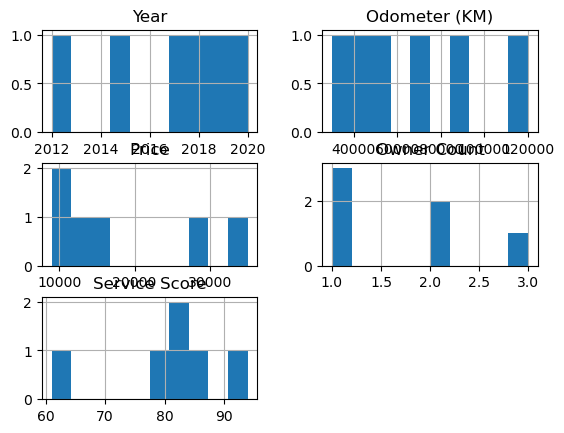

In [8]:
car_data.hist()

<Axes: >

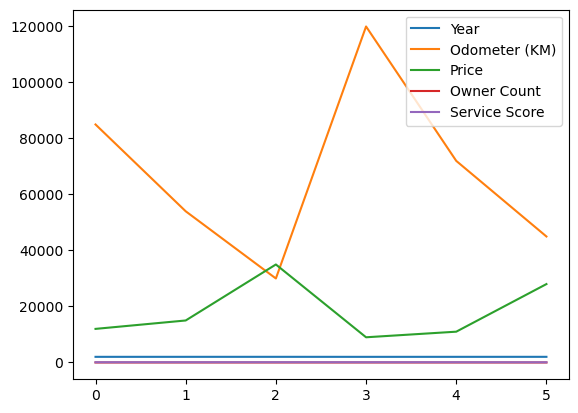

In [9]:
car_data.plot()

In [10]:
pd.crosstab(car_data["Make"], car_data["Price"])

Price,9000,11000,12000,15000,28000,35000
Make,,,,,,
BMW,0,0,0,0,1,1
Honda,0,0,0,1,0,0
Nissan,0,1,0,0,0,0
Toyota,1,0,1,0,0,0


In [11]:
car_data.loc[5, ["Make", "Model"]]

Make          BMW
Model    3 Series
Name: 5, dtype: object

In [12]:
car_data.head()

,Make,Model,Year,Odometer (KM),Price,Condition,Fuel,Owner Count,Service Score
0,Toyota,Corolla,2015,85000,12000,Used,Petrol,1,79
1,Honda,Civic,2018,54000,15000,Used,Petrol,2,84
2,BMW,X5,2020,30000,35000,Certified,Diesel,1,94
3,Toyota,Camry,2012,120000,9000,Used,Hybrid,3,83
4,Nissan,Altima,2017,72000,11000,Used,Hybrid,1,87


In [ ]:
car_sales = pd.read_csv('../data/car-sales.csv')

In [17]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


In [18]:
car_sales["Price"]

0     $4,000.00
1     $5,000.00
2     $7,000.00
3    $22,000.00
4     $3,500.00
5     $4,500.00
6     $7,500.00
7     $7,000.00
8     $6,250.00
9     $9,700.00
Name: Price, dtype: object

In [19]:
# to_numeric() is used to conver ta df column or a pd series to int dtype 
# Throws an error if the column you're trying to convert contains any chars that can't be converted

# Ex: pd.to_numeric(car_sales["Price"])

In [20]:
car_sales['Price'] = pd.to_numeric(car_sales["Price"].str.replace('[/$/,/]', '', regex=True))

In [21]:
car_seats = pd.Series([2, 4, 4, 2, 2, 8, 4, 4, 2, 2, 4])
# Adding a new column to dataframe
car_sales['Seats'] = car_seats
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,4000.0,2
1,Honda,Red,87899,4,5000.0,4
2,Toyota,Blue,32549,3,7000.0,4
3,BMW,Black,11179,5,22000.0,2
4,Nissan,White,213095,4,3500.0,2


In [22]:
trimmed_car_sales_data = car_sales.sample(frac=0.5)

In [23]:
trimmed_car_sales_data.reset_index()

,index,Make,Colour,Odometer (KM),Doors,Price,Seats
0,7,Honda,Blue,54738,4,7000.0,4
1,4,Nissan,White,213095,4,3500.0,2
2,3,BMW,Black,11179,5,22000.0,2
3,2,Toyota,Blue,32549,3,7000.0,4
4,6,Honda,Blue,45698,4,7500.0,4


In [24]:
# Apply a function to column or process a new column

car_data['Cubits'] = pd.Series([1600, 1800, 3000, 2500, 1200, 2000])

In [25]:
car_data['Price'].dtype

dtype('int64')

In [26]:
car_data['GstPrice'] = car_data.apply(lambda cd: cd['Price'] + ((cd['Price'] / 100) * 18) if cd['Fuel'] != 'Hybrid' else cd['Price'] + ((cd['Price'] / 100) * 40) if cd['Cubits'] > 1200 else cd['Price'] + ((cd['Price'] / 100) * 18), axis=1)

In [27]:
car_data.head()

,Make,Model,Year,Odometer (KM),Price,Condition,Fuel,Owner Count,Service Score,Cubits,GstPrice
0,Toyota,Corolla,2015,85000,12000,Used,Petrol,1,79,1600,14160.0
1,Honda,Civic,2018,54000,15000,Used,Petrol,2,84,1800,17700.0
2,BMW,X5,2020,30000,35000,Certified,Diesel,1,94,3000,41300.0
3,Toyota,Camry,2012,120000,9000,Used,Hybrid,3,83,2500,12600.0
4,Nissan,Altima,2017,72000,11000,Used,Hybrid,1,87,1200,12980.0
